In [ ]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from scipy import stats
from statsmodels.stats.weightstats import DescrStatsW
import statistics
import matplotlib.pyplot as plt

# 5732位苏格兰军人胸围数据


In [2]:
df = pd.DataFrame(
    {
        "measurement":[33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48],
        "freq":[3,19,81,189,409,753,1062,1082,935,646,313,168,50,18,3,1]
    }
)

<AxesSubplot:xlabel='measurement', ylabel='freq'>

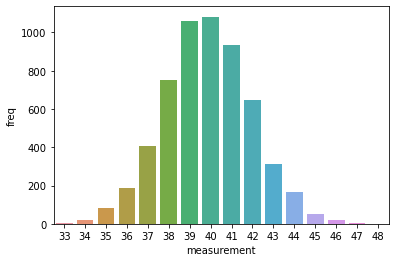

In [3]:
sns.barplot(x="measurement",y="freq",data=df)

平均值

In [4]:
DescrStatsW(data = df["measurement"],weights=df["freq"],ddof=1).mean

39.848918353105375

标准差

In [5]:
DescrStatsW(data = df["measurement"],weights=df["freq"],ddof=1).std

2.0733859284943357

# 一般正态分布

**标准差一样，均值不同**

<AxesSubplot:ylabel='Density'>

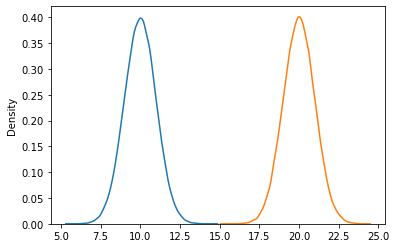

In [6]:
# 生成样本量为10000服从标准正态分布的数值
x_1 = np.random.normal(10,1, size = 100000)#平均值=10.标准差=1
sns.kdeplot(x_1)#核密度图

x_2 = np.random.normal(20,1, size = 100000)#平均值=10.标准差=1
sns.kdeplot(x_2)

**均值相等，标准差不同**

<AxesSubplot:ylabel='Density'>

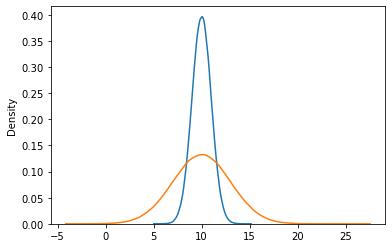

In [7]:
x_3 = np.random.normal(10,1, size = 1000000)
sns.kdeplot(x_3)

x_4 = np.random.normal(10,3, size = 1000000)
sns.kdeplot(x_4)

# 标准正态分布

<AxesSubplot:ylabel='Density'>

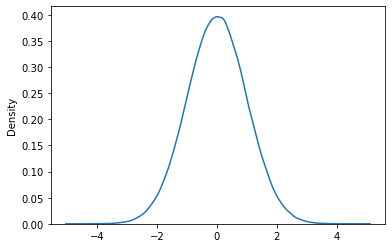

In [8]:
# 生成样本量为1000000服从标准正态分布的数值
normal_data = np.random.normal(0,1, size = 1000000)
sns.kdeplot(normal_data)

# 计算Z值

$$Z= \frac{X- \mu}{\sigma}$$

**如果X是服从均值为100，标准差为50的正态分布。给定X=200，计算其Z分数（Z-score）：**

In [9]:
z = (200-100)/50
z

2.0

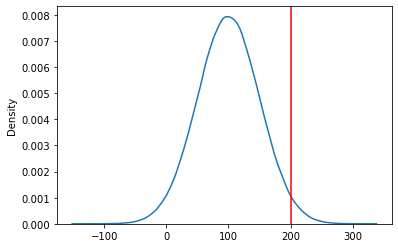

In [10]:
mydata = np.random.normal(100,50, size = 1000000)
sns.kdeplot(mydata)
plt.axvline(x=200, color='red')

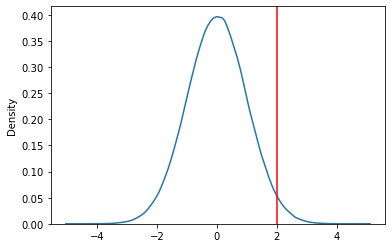

In [11]:
sns.kdeplot(normal_data)
plt.axvline(x=2, color='red')

In [12]:
# 写下正态分布的均值与标准差

mu = 0
sigma = 1

In [13]:
# 计算P(Z < 2.00) 

z = 2

prob = stats.norm.cdf(z,mu,sigma)
prob

0.9772498680518208

## 统计学 VS 经济学 哪一门课的班级排名比较好

小明的统计学67分，平均为65分，标准差10分
经济学72分，平均为75分，标准差5分

In [14]:
stat_score = (67-65)/10
econ_score = (72-75)/5

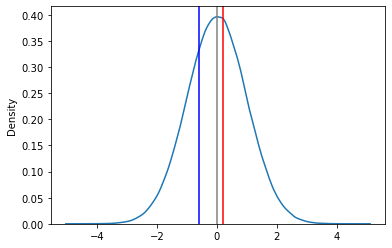

In [15]:

sns.kdeplot(normal_data)
plt.axvline(x=stat_score, color='red')#统计学课程分数，转化为标准分
plt.axvline(x=econ_score, color='blue')#经济学课程分数，转化为标准分
plt.axvline(x=0, color='gray')#零点

## X代表的是网络下载图片所需要的时间（单位为秒）
## 假如X服从均值为18.0，标准差为5.0的正态分布。

In [12]:
mydist = statistics.NormalDist(mu = 18, sigma = 5)

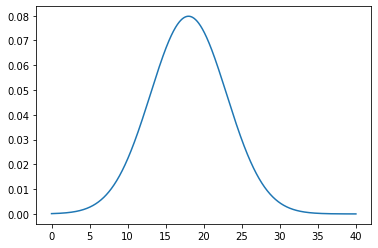

In [36]:
# 画图
mean = 18
stddev = 5
# Create an array of x values for the normal distribution
x = np.linspace(0, 40, 1000)

# Calculate the y values for the normal distribution
y = stats.norm.pdf(x, loc = mean, scale = stddev)
# Plot the normal distribution
plt.plot(x, y)

**求P(X < 18.6)**

In [13]:
mydist.cdf(18.6)#从负无穷到18.6的阴影面积

0.547758426020584

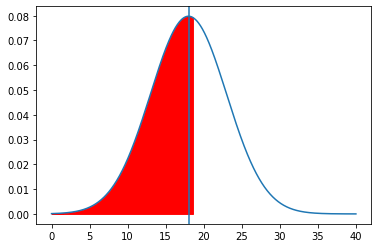

In [29]:
# 示意图
plt.plot(x, y)
plt.axvline(x=18)
plt.fill_between(x,0,y,where = x < 18.6,color="red")

**求P(X > 18.6)**

In [ ]:
1 -mydist.cdf(18.6)

0.452241573979416

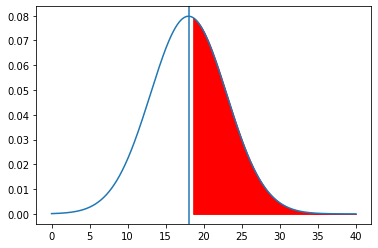

In [35]:
# 示意图
plt.plot(x, y)
plt.axvline(x=18)
plt.fill_between(x,0,y,where = x > 18.6,color="red")

**求P(18 < X < 18.6)**

In [ ]:
mydist.cdf(18.6) - mydist.cdf(18) 

0.047758426020584

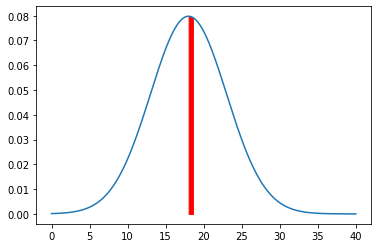

In [32]:
# 示意图
plt.plot(x, y)
plt.fill_between(x,0,y,where = (x > 18) & (x < 18.6),color="red")

**求P(17.4 < X < 18)**

In [ ]:
mydist.cdf(18) - mydist.cdf(17.4) 

0.047758426020584

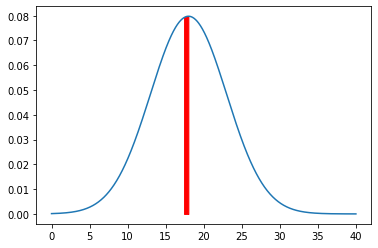

In [33]:
# 示意图
plt.plot(x, y)
plt.fill_between(x,0,y,where = (x > 17.4) & (x < 18),color="red")

## 假如人群的智商服从正态分布，且均值μ=100，标准差σ=10. 


In [ ]:
dist = statistics.NormalDist(mu = 100, sigma = 10)

**（1）电影《阿甘正传》的主角阿甘的智商为75，请算一下比他聪明的人有多少？（说出百/千分比）**

In [ ]:
1 - dist.cdf(75)

0.9937903346742238

**（2）据说高智商俱乐部门萨俱乐部的入会门槛为智商位于人群的前2%,请算一下智商位于人群的前2%的智商值为多少？**

In [ ]:
dist.inv_cdf(p=0.98)#inv：inverse ;知道概率求分界线

120.53748910631822

**（3）如果我们把低于平均值1.96个标准差（Z = -1.96）至高于平均值1.96个标准差（Z = 1.96）的群体定义为普通人（占全部人口的95%），请算一算普通人智商的上下限。**

方法一：

In [ ]:
limit_1 = -1.96*sigma + mu
limit_2 = 1.96*sigma + mu
limit_1,limit_2

(80.4, 119.6)

方法二：

In [ ]:
stats.norm.interval(confidence=0.95,loc=100, scale =10)

**（4）在80-120的范围内随机抽取两个整数（记为a和b,且a<b），请计算智商为a~b的人口占全部人口的多少？[即求P(a < X < b)]**

In [ ]:
mylist = list(range(80,121))#创建列表，范围:80-120
num_1 = np.random.choice(mylist,1)
num_2 = np.random.choice(mylist,1)
num_1,num_2

(array([86]), array([120]))

In [ ]:
dist.cdf(num_2) - dist.cdf(num_1)

0.8964932088180498